In [227]:
import pandas as pd
import numpy as np # para álgebra linear
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Load Dataset
df = pd.read_csv('db.csv')

#Busca apenas a cidade joinville (no caso é a cidade n.1) 
joinville = df.loc[(df['cidade']==1)].astype('int64')
joinville.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 6 columns):
cidade     95 non-null int64
m2Aprox    95 non-null int64
4mm        95 non-null int64
3mm        95 non-null int64
$4mm       95 non-null int64
$3mm       95 non-null int64
dtypes: int64(6)
memory usage: 5.2 KB


In [228]:
#define os inputs (uso apenas a coluna m2Aprox, o restante dropa)
X = joinville.drop(['3mm'], axis = 1)
#target de predição, preço final 3mm
y = joinville['3mm']

In [229]:
#Divido em trino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [230]:
"""
Funções de ativação.
https://matheusfacure.github.io/2017/07/12/activ-func/#fun-act
"""

#importa MPL regressor
from sklearn.neural_network import MLPRegressor

#Defino nnReg como meu regressor
#Defino a parametrização
nnReg = MLPRegressor(activation='relu',
                     solver='lbfgs',
                     hidden_layer_sizes=(4,), 
                     random_state=None)

In [231]:
#Treino com a base de treinos
nnReg.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [232]:
#realiza predição
pred = nnReg.predict(X_test)

In [233]:
'''
Erro Absoluto Médio (MAE): Mede a magnitude média dos erros em um conjunto de 
previsões, sem considerar sua direção. É a média sobre a amostra de teste das 
diferenças absolutas entre previsão e observação real, onde todas as diferenças 
individuais têm peso igual.

Se o valor absoluto não for obtido (os sinais dos erros não são removidos), 
o erro médio torna-se o erro de polarização média (MBE) e é geralmente 
destinado a medir o viés de modelo médio. O MBE pode transmitir informações 
úteis, mas deve ser interpretado com cautela porque os erros positivos e 
negativos serão cancelados.

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
'''

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

1570.7814131495695

In [234]:
"""
Robusto contra outliners.
Não suporta multi-output.

A perda é calculada tomando a mediana de todas as diferenças absolutas
entre o alvo e a predição.
"""
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,pred)

293.05190467843204

In [235]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 43 to 62
Data columns (total 5 columns):
cidade     19 non-null int64
m2Aprox    19 non-null int64
4mm        19 non-null int64
$4mm       19 non-null int64
$3mm       19 non-null int64
dtypes: int64(5)
memory usage: 912.0 bytes


In [236]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 45 to 9
Data columns (total 5 columns):
cidade     76 non-null int64
m2Aprox    76 non-null int64
4mm        76 non-null int64
$4mm       76 non-null int64
$3mm       76 non-null int64
dtypes: int64(5)
memory usage: 3.6 KB


In [237]:
print('Média do erro absoluto: ', np.absolute((pred - y_test)).mean())
print('Média do erro relativo: ', np.absolute(((pred - y_test) / y_test)).mean())

Média do erro absoluto:  1570.7814131495693
Média do erro relativo:  0.04646339519029377


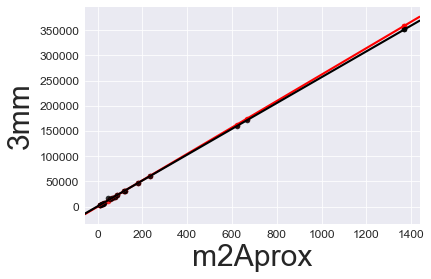

In [238]:
import seaborn as sns
sns.set()

# Set context to `"paper"`
sns.set_context("paper", font_scale=1.5, rc={"font.size":8,"axes.labelsize":30})
    
sns.regplot(x=X_test['m2Aprox'], y=pred,color='red');
sns.regplot(x=X_test['m2Aprox'], y=y_test, color='black');


In [239]:
r2_score(y_test,pred)

0.9992709635589858